## We covered a lot of information today and I'd like you to practice developing classification trees on your own. For each exercise, work through the problem, determine the result, and provide the requested interpretation in comments along with the code. The point is to build classifiers, not necessarily good classifiers (that will hopefully come later)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import tree
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix

### 1. Load the iris dataset and create a holdout set that is 50% of the data (50% in training and 50% in test). Output the results (don't worry about creating the tree visual unless you'd like to) and discuss them briefly (are they good or not?)

In [11]:
iris = datasets.load_iris()

In [28]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [12]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
type(iris['data'])

numpy.ndarray

In [3]:
characteristics = iris.data[:,2:]
species = iris.target

In [4]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(characteristics,species)

In [5]:
characteristics_train, characteristics_test, species_train, species_test = train_test_split(characteristics,species,test_size=0.5,train_size=0.5)

In [6]:
dt = dt.fit(characteristics_train,species_train)

In [7]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
from sklearn import metrics

In [18]:
def measure_performance(characteristics,species,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    species_pred=clf.predict(characteristics)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(species, species_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(species, species_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(species, species_pred),"\n")

In [10]:
measure_performance(characteristics_test,species_test,dt)

Accuracy:0.947 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.96      0.88      0.92        25
          2       0.90      0.96      0.93        27

avg / total       0.95      0.95      0.95        75
 

Confusion matrix
[[23  0  0]
 [ 0 22  3]
 [ 0  1 26]] 



In [11]:
# ACCURACY: The model predicts the species correctly for 94.7% of plant samples

# PRECISION: 
# Species 1 is predicted precisely for all cases -- no false negatives/false positives
# For species 2, the model predicted 96% of cases precisely as true positives, 4% were false positives
# For species 3, the model predicted 90% of cases precisely as true positives, 10% were false positives

# CONFUSION MATRIX

# 23 plant samples were classified as Iris species 1
# 22 plant samples were classified as Iris species 2, with 3 more being falsely labelled as species 3
# 26 plant samples were classified as Iris species 3, with 1 more being falsely labelled as species 2

# Given the fact that the model doesn't fit 100% it seems at least not to be overfitting

In [19]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
species_pred = dt.fit(characteristics_train, species_train).predict(characteristics_test)

Confusion matrix, without normalization
[[23  0  0]
 [ 0 22  3]
 [ 0  1 26]]


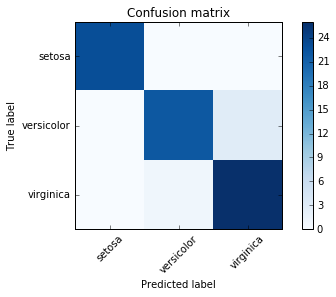

In [14]:
cm = metrics.confusion_matrix(species_test, species_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

### 2. Redo the model with a 75% - 25% training/test split and compare the results. Are they better or worse than before? Discuss why this may be.

In [19]:
characteristics_train, characteristics_test, species_train, species_test = train_test_split(characteristics,species,test_size=0.25,train_size=0.75)

In [20]:
measure_performance(characteristics_test,species_test,dt)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        38
 

Confusion matrix
[[13  0  0]
 [ 0 10  0]
 [ 0  0 15]] 



In [ ]:
# ACCURACY: The model predicts the species correctly for 100% of plant samples

# CONFUSION MATRIX

# 13 plant samples were classified as Iris species 1
# 10 plant samples were classified as Iris species 2
# 15 plant samples were classified as Iris species 3

# Maybe the test dataset is to small when setting it to a share of 25% of all data: so that the training data already 
# covers all eventualities and thus is overfitting; 
# not enough variability in test dataset to highlight inaccuracy of the model

# What's a good split for training vs test data? (Maybe depends on overall size?)

### 3. Load the breast cancer dataset (`datasets.load_breast_cancer()`) and perform basic exploratory analysis. What attributes to we have? What are we trying to predict?
For context of the data, see the documentation here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
# Only one donor? (Nick Street) --> big issue with marker sensitivity in detection!
# With a males-sounding first name (having breast cancer in 1995, so at least 30 years old) for breast cancer cells?

In [3]:
cancer = datasets.load_breast_cancer()

In [ ]:
# Reading up on scikit learn -- documentation is not that good, this one is a bit better: 
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/base.py

In [9]:
#WE ARE TRYING TO PREDICT WHETHER A TUMOR IS MALIGNANT OR BENIGN
print(cancer.target_names) 

['malignant' 'benign']


In [10]:
#THESE ARE ALL THE ATTRIBUTES AVAILABLE
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
#BASIC DESCRIPTIVE STATISTICS BELOW IN THE TABLE
print(cancer.DESCR) 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

### 4. Using the breast cancer data, create a classifier to predict the type of seed. Perform the above hold out evaluation (50-50 and 75-25) and discuss the results.

In [13]:
markers = cancer.data[:,:]
seeds = cancer.target

In [14]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(markers,seeds)

#### 50-50

In [15]:
markers_train, markers_test, seeds_train, seeds_test = train_test_split(markers,seeds,test_size=0.5,train_size=0.5)

In [16]:
dt = dt.fit(markers_train,seeds_train)

In [33]:
def measure_performance(markers,seeds,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    seeds_pred=clf.predict(markers)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(seeds, seeds_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(seeds, seeds_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(seeds, seeds_pred),"\n")

In [34]:
measure_performance(markers_test,seeds_test,dt)

Accuracy:0.888 

Classification report
             precision    recall  f1-score   support

          0       0.81      0.90      0.85        52
          1       0.94      0.88      0.91        91

avg / total       0.89      0.89      0.89       143
 

Confusion matrix
[[47  5]
 [11 80]] 



In [ ]:
# malignant = 0
# benign = 1

# ACCURACY
# The classifier predicts 88 percent of samples correctly

# CONFUSION MATRIX:
# 47 samples are correctly predicted as malignant, whereas there are 5 that are malignant, but classified as benign
# 80 samples are correctly predicted as benign, whereas there are 11 that are benign, but classified as malignant

# PRECISION
# The matter outlined above translates to the following precision:

# For malignant samples, the model predicted 81% of cases precisely as true positives, 9% were false positives 
# For benign samples, the model predicted 94% of cases precisely as true positives, 6% were false positives

#### 75-25

In [35]:
markers_train, markers_test, seeds_train, seeds_test = train_test_split(markers,seeds,test_size=0.25,train_size=0.75)

In [36]:
dt = dt.fit(markers_train,seeds_train)

In [37]:
def measure_performance(markers,seeds,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    seeds_pred=clf.predict(markers)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(seeds, seeds_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(seeds, seeds_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(seeds, seeds_pred),"\n")

In [38]:
measure_performance(markers_test,seeds_test,dt)

Accuracy:0.944 

Classification report
             precision    recall  f1-score   support

          0       0.94      0.90      0.92        51
          1       0.95      0.97      0.96        92

avg / total       0.94      0.94      0.94       143
 

Confusion matrix
[[46  5]
 [ 3 89]] 



In [ ]:
# With the 75-25 split, the classifier performs better

# ACCURACY
# The classifier predicts 94 percent of samples correctly

# CONFUSION MATRIX:
# 46 samples are correctly predicted as malignant, whereas there are 5 that are malignant, but classified as benign
# 89 samples are correctly predicted as benign, whereas there are 3 that are benign, but classified as malignant

# PRECISION
# The matter outlined above translates to the following precision:

# For malignant samples, the model predicted 94% of cases precisely as true positives, 6% were false positives 
# For benign samples, the model predicted 95% of cases precisely as true positives, 5% were false positives